https://towardsdatascience.com/sentiment-analysis-of-covid-19-vaccine-tweets-dc6f41a5e1af

https://github.com/sejaldua/covid19-vaccy-tweets-NLP

https://medium.com/analytics-vidhya/sentiment-analysis-with-nltk-textblob-and-flair-a321d1460867

Mount Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.DataFrame({'created_at': [], 'clean_tweet' : [], 'sentiment':[]})
data1 = pd.read_csv('/content/drive/MyDrive/Teaching at CUE/2021/Thesis/IT 581 Project/Summer 2021/Adeola IT 581 Project Thesis/Polarity_Subjectivity/Covid-19 Twitter Dataset (Apr-Jun 2020).csv', encoding='ISO-8859-1')
data2 = pd.read_csv('/content/drive/MyDrive/Teaching at CUE/2021/Thesis/IT 581 Project/Summer 2021/Adeola IT 581 Project Thesis/Polarity_Subjectivity/Covid-19 Twitter Dataset (Aug-Sep 2020).csv', encoding='ISO-8859-1')
data = pd.concat([data, data1[['created_at', 'clean_tweet', 'sentiment']]], axis=0, ignore_index = True)
data = pd.concat([data, data2[['created_at', 'clean_tweet', 'sentiment']]], axis=0, ignore_index = True)

In [ ]:
y_label = list(data['sentiment'])
label_dic = {
    'pos' : 0,
    'neg' : 1,
    'neu' : 2 
}
y = []
for x in y_label:
  y.append(label_dic[x])

In [ ]:
import pandas as pd
data['date'] = pd.to_datetime(data.created_at)

In [ ]:
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month

In [ ]:
def mon(x):
  m = x.split(' ')
  print(m)
  return m[1]

In [ ]:
data = data.dropna()
data['Month'] = data['created_at'].astype('str').apply(mon)

Streaming output truncated to the last 5000 lines.
['Tue', 'Oct', '20', '20:08:26', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:25', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:24', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:23', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:22', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:21', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:20', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:19', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:18', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:17', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:16', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:15', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:14', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:13', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:12', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:11', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:10', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:09', '+0000', '2020']
['Tue', 'Oct', '20', '20:08:08', '+0000', '2020']

In [ ]:
data['date']=data['date'].dt.date

In [ ]:
data

,created_at,clean_tweet,sentiment,date,year,month,Month
0,Sun Apr 19 21:21:54 +0000 2020,call leader help protect refuge covid19 provid...,pos,2020-04-19,2020.0,4.0,Apr
1,Sun Apr 19 21:21:53 +0000 2020,ogun state support cbn nirsal covid19 target c...,pos,2020-04-19,2020.0,4.0,Apr
2,Sun Apr 19 21:21:52 +0000 2020,polic offici base namahadi polic station busi ...,pos,2020-04-19,2020.0,4.0,Apr
3,Sun Apr 19 21:21:51 +0000 2020,covid19 oyo discharg two patient,neu,2020-04-19,2020.0,4.0,Apr
4,Sun Apr 19 21:21:50 +0000 2020,condol famili surviv,neu,2020-04-19,2020.0,4.0,Apr
...,...,...,...,...,...,...,...
555551,Tue Oct 20 20:35:43 +0000 2020,cultur china brillianc huax celebr th annivers...,neg,2020-10-20,2020.0,10.0,Oct
555552,Tue Oct 20 20:35:42 +0000 2020,trump call cnn bastard cover covid19 hear keil...,neg,2020-10-20,2020.0,10.0,Oct
555553,Tue Oct 20 20:35:41 +0000 2020,nurs home kansa singl resid test posit coronav...,neu,2020-10-20,2020.0,10.0,Oct
555554,Tue Oct 20 20:35:40 +0000 2020,trump call cnn bastard cover covid19 hear keil...,neg,2020-10-20,2020.0,10.0,Oct


Exploratory Data Analysis (EDA)

In [ ]:
data.describe()

,year,month
count,554223.0,554223.000000
mean,2020.0,7.566068
std,0.0,2.353223
min,2020.0,4.000000
25%,2020.0,5.000000
50%,2020.0,9.000000
75%,2020.0,10.000000
max,2020.0,10.000000


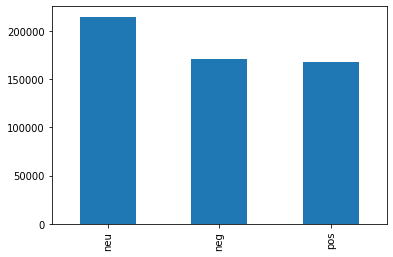

In [ ]:
# Distribution of sentiments
data['sentiment'].value_counts().head(n=5).plot.bar()

Sentiment Analysis

In [ ]:
from textblob import TextBlob


In [ ]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
data['polarity'] = data['clean_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['clean_tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
data.head()

,created_at,clean_tweet,sentiment,date,year,month,Month,polarity,subjectivity
0,Sun Apr 19 21:21:54 +0000 2020,call leader help protect refuge covid19 provid...,pos,2020-04-19,2020.0,4.0,Apr,0.000000,0.000000
1,Sun Apr 19 21:21:53 +0000 2020,ogun state support cbn nirsal covid19 target c...,pos,2020-04-19,2020.0,4.0,Apr,0.000000,0.000000
2,Sun Apr 19 21:21:52 +0000 2020,polic offici base namahadi polic station busi ...,pos,2020-04-19,2020.0,4.0,Apr,-0.292857,0.785714
3,Sun Apr 19 21:21:51 +0000 2020,covid19 oyo discharg two patient,neu,2020-04-19,2020.0,4.0,Apr,0.000000,0.000000
4,Sun Apr 19 21:21:50 +0000 2020,condol famili surviv,neu,2020-04-19,2020.0,4.0,Apr,0.000000,0.000000


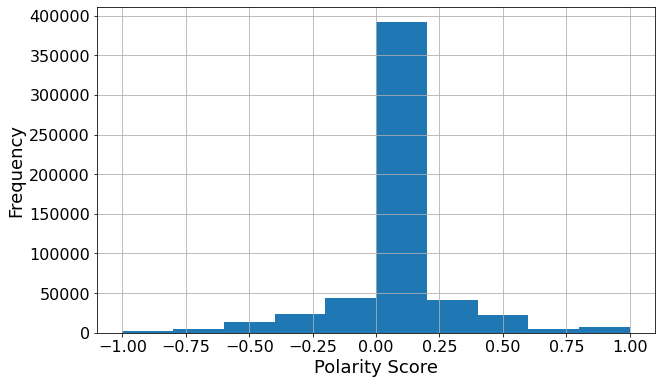

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
data['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("/content/drive/MyDrive/Teaching at CUE/2021/Thesis/IT 581 Project/Summer 2021/Adeola IT 581 Project Thesis/Polarity_Subjectivity/polarity_hist.png")

In [ ]:
!pwd

/content


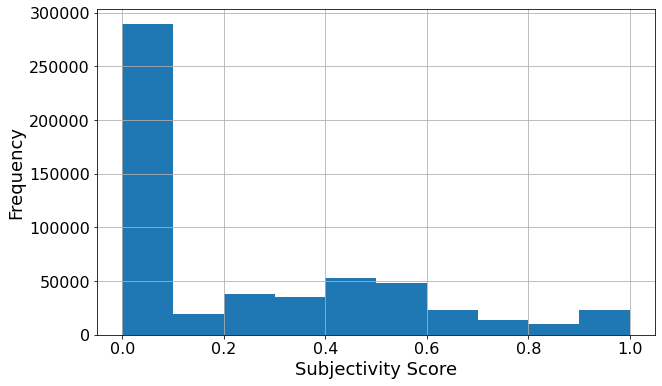

In [ ]:
fig = plt.figure(figsize=(10, 6))
data['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("/content/drive/MyDrive/Teaching at CUE/2021/Thesis/IT 581 Project/Summer 2021/Adeola IT 581 Project Thesis/Polarity_Subjectivity/subjectivity_hist.png")


Inspection

In [ ]:
# inspect the most negatively charged tweets
data.sort_values(by='polarity', ascending=True)[['clean_tweet', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,clean_tweet,polarity,subjectivity
0,covid19 worst diseas process ever work year ic...,-1.0,1.0
1,result speak america world covid19 case death ...,-1.0,1.0
2,unit state reach anoth grim mileston surpass m...,-1.0,1.0
3,seem think fall hous price amidst covid19 woul...,-1.0,1.0
4,obes asthma push worst possibl risk combin w c...,-1.0,1.0
5,eert say scammer ingeni evil especi amid pande...,-1.0,1.0
6,need way disgust aim evil level cynic michigan...,-1.0,1.0
7,covid19 worst diseas process ever work year ic...,-1.0,1.0
8,south dakota worst covid19 surg countri,-1.0,1.0
9,trump record world worst respons biggest econo...,-1.0,1.0


In [ ]:
# inspect the most positively charged tweets
data.sort_values(by='polarity', ascending=False)[['clean_tweet', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,clean_tweet,polarity,subjectivity
0,covid19 led greatest disrupt educ histori affe...,1.0,1.0
1,data perfect death two month covid19 month ann...,1.0,1.0
2,carehom uk best one ipad share two carehom,1.0,0.3
3,look contact best servic,1.0,0.3
4,best,1.0,0.3
5,best defens covid19 scienc begin trump margin ...,1.0,0.3
6,dog learn detect covid19 man best friend lend h,1.0,0.3
7,best way beat covid19 sack chri witti,1.0,0.3
8,best defens covid19 scienc begin trump margin ...,1.0,0.3
9,importantli trump access best care world peopl...,1.0,0.3


In [ ]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
data.sort_values(by='subjectivity', ascending=True)[['clean_tweet', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,clean_tweet,polarity,subjectivity
0,call leader help protect refuge covid19 provid...,0.0,0.0
1,die covid19 die alon,0.0,0.0
2,test today eerienc symptom impress effici,0.0,0.0
3,everyon forgot covid19 funni world run fear,0.0,0.0
4,go away confront need survivor disappear,0.0,0.0
5,american die covid19 donald trump hospit,0.0,0.0
6,everyon swallow narr covid19 spike protest rem...,0.0,0.0
7,world vision commit usd million three phase co...,0.0,0.0
8,die covid19 die alon,0.0,0.0
9,given continu spread covid19 commun close cont...,0.0,0.0


In [ ]:
# inspect the most objective tweets
data.sort_values(by='subjectivity', ascending=False)[['clean_tweet', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,clean_tweet,polarity,subjectivity
0,mechan logist airlin worker brave work covid19...,0.8,1.0
1,nice thing,0.6,1.0
2,father die covid19 alon final ritual ya allah ...,0.0,1.0
3,covid19 crisi far grow pandem enter recoveri p...,0.1,1.0
4,notic evil peopl wh get covid19 coincid think ...,-1.0,1.0
5,mother die covid19 one month ago go share stor...,-0.5,1.0
6,dr brown covid19 campagin final,0.0,1.0
7,woman labour miscarri receiv worst news alon w...,-1.0,1.0
8,still distraught weekend day thoma covid19 cas...,-0.6,1.0
9,florida man thought coronaviru fake crisi chan...,-0.5,1.0


In [ ]:
import plotly.express as px
!pip install orca
import orca
# let's inspect how many tweets there were with respect to time
timeline = data.groupby(['date']).count().reset_index()
timeline['count'] = timeline['clean_tweet']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()

#import plotly.graph_objects as go
#import orca
#import plotly
#%%
#plotly.io.orca.config.executable = r'C:\Users\Kuba\AppData\Local\Programs\Python\Python37\Lib\site-packages\orca'
#plotly.io.orca.config.save()
#fig.write_image("/content/drive/MyDrive/Teaching at CUE/2021/Thesis/IT 581 Project/Summer 2021/Adeola IT 581 Project Thesis/Polarity_Subjectivity/tweet_freq_over_time.png")

Time-Series Sentiment Analysis

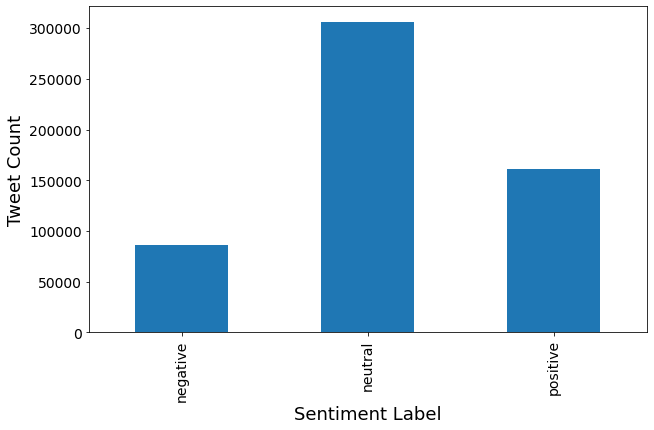

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [data['polarity'].between(-1, -0.01), data['polarity'].between(-0.01, 0.01), data['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
data['sentiment_1'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
data['sentiment_1'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("/content/drive/MyDrive/Teaching at CUE/2021/Thesis/IT 581 Project/Summer 2021/Adeola IT 581 Project Thesis/sentiment_value_counts_1", bbox_inches='tight');

In [ ]:
timeline = data.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = data.groupby(['date']).count().reset_index()['clean_tweet']
timeline = timeline[['date', 'count', 'polarity', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

,date,count,polarity,subjectivity
0,2020-04-19,1197,0.018226,0.259081
1,2020-04-22,1123,0.049135,0.242638
2,2020-04-23,193,0.033385,0.241868
3,2020-04-24,7523,0.038269,0.222670
4,2020-04-25,10155,0.038531,0.232840
...,...,...,...,...
101,2020-10-16,8395,0.048202,0.237909
102,2020-10-17,10079,0.041301,0.257493
103,2020-10-18,3369,0.037598,0.223072
104,2020-10-19,19515,0.049207,0.235477


In [ ]:
timeline.sort_values(by='polarity', ascending=False)

,date,count,polarity,subjectivity
67,2020-09-01,5085,0.093921,0.289576
32,2020-05-24,9765,0.085028,0.301436
81,2020-09-26,7940,0.084476,0.236013
97,2020-10-12,4672,0.071445,0.267228
72,2020-09-13,2420,0.067047,0.237035
...,...,...,...,...
62,2020-08-26,2247,0.008054,0.212665
75,2020-09-19,2715,0.001952,0.153579
38,2020-05-30,2183,-0.000225,0.251339
37,2020-05-29,1084,-0.008565,0.252787


In [ ]:
data[data['date'].astype(str) == '2020-06-14'][['date', 'clean_tweet', 'polarity', 'subjectivity', 'sentiment']]

,date,clean_tweet,polarity,subjectivity,sentiment
227742,2020-06-14,chaz peep gon na prove covid19 bullshit,0.000000,0.000000,neg
227743,2020-06-14,still aliv covid19,0.000000,0.000000,neu
227744,2020-06-14,recov corona allah bless new life gave chanc m...,0.136364,0.454545,pos
227745,2020-06-14,year ago monstrou hepat eeriment perform menta...,-0.100000,0.200000,neu
227746,2020-06-14,two long haul flight lo angel intern airport m...,-0.025000,0.200000,neu
...,...,...,...,...,...
229447,2020-06-14,covid19 gone riot new day fuck give pill take ...,-0.087879,0.351515,neg
229448,2020-06-14,covid19 worst diseas process ever work year ic...,-1.000000,1.000000,neg
229449,2020-06-14,remind friendli neighborhood scienc commun wea...,0.000000,0.000000,pos
229450,2020-06-14,yesterday across uk funer arrang famili devast l,0.000000,0.000000,neu


In [ ]:
# Plot tweets over time, color-coded by average polarity score
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [ ]:
# # Plot tweets over time, color-coded by average subjectivity score
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

Filter by Vacancy

In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['clean_tweet'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['clean_tweet'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['clean_tweet']
    timeline = timeline[['date', 'count', 'polarity', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [ ]:
pfizy_df, pfizy_timeline = filter_by_vaccy(data, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(290, 10)


In [ ]:
moderna_df, moderna_timeline = filter_by_vaccy(data, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(217, 10)


In [ ]:
astra_df, astra_timeline = filter_by_vaccy(data, ['astrazeneca'])
astra_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

,created_at,clean_tweet,sentiment,date,year,month,Month,polarity,subjectivity,sentiment_1
0,Wed Aug 26 08:01:58 +0000 2020,astrazeneca say start trial antibodi base cock...,pos,2020-08-26,2020.0,8.0,Aug,-0.8000,1.0000,negative
1,Tue Sep 22 09:39:28 +0000 2020,two peopl fallen ill trial astrazeneca vaccin ...,neg,2020-09-22,2020.0,9.0,Sep,-0.5000,1.0000,negative
2,Fri Sep 25 20:27:01 +0000 2020,astrazeneca vaccin trial still paus u question...,neg,2020-09-25,2020.0,9.0,Sep,-0.5000,1.0000,negative
3,Fri Sep 25 20:19:27 +0000 2020,astrazeneca vaccin trial still paus u question...,neg,2020-09-25,2020.0,9.0,Sep,-0.5000,1.0000,negative
4,Sat Sep 12 19:45:27 +0000 2020,astrazeneca resum uk trial covid19 vaccin halt...,neg,2020-09-12,2020.0,9.0,Sep,-0.5000,1.0000,negative
5,Thu Oct 01 19:21:41 +0000 2020,fda broaden investig seriou ill astrazeneca co...,neg,2020-10-01,2020.0,10.0,Oct,-0.5000,1.0000,negative
6,Sun Sep 13 13:47:56 +0000 2020,astrazeneca resum uk trial covid19 vaccin halt...,neg,2020-09-13,2020.0,9.0,Sep,-0.5000,1.0000,negative
7,Wed Sep 30 16:39:47 +0000 2020,drug maker astrazeneca paus covid19 vaccin tri...,neg,2020-09-30,2020.0,9.0,Sep,-0.3125,0.6875,negative
8,Sun Sep 20 11:31:24 +0000 2020,astrazeneca say nd covid19 vaccin trial volunt...,neg,2020-09-20,2020.0,9.0,Sep,-0.3000,0.8000,negative
9,Sun Sep 20 11:31:28 +0000 2020,astrazeneca say nd covid19 vaccin trial volunt...,neg,2020-09-20,2020.0,9.0,Sep,-0.3000,0.8000,negative


In [ ]:
covaxin_df, covaxin_timeline = filter_by_vaccy(data, ['covaxin'])
covaxin_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

,created_at,clean_tweet,sentiment,date,year,month,Month,polarity,subjectivity,sentiment_1
0,Sun Sep 06 18:43:59 +0000 2020,bharat biotech get nod move phase trial prospe...,pos,2020-09-06,2020.0,9.0,Sep,0.0,0.0,neutral
1,Sun Sep 06 19:04:29 +0000 2020,bharat biotech get nod move phase trial prospe...,pos,2020-09-06,2020.0,9.0,Sep,0.0,0.0,neutral
2,Sun Sep 06 20:30:43 +0000 2020,bharat biotech get nod move phase trial prospe...,pos,2020-09-06,2020.0,9.0,Sep,0.0,0.0,neutral
3,Sun Sep 06 20:39:18 +0000 2020,bharat biotech get nod move phase trial prospe...,pos,2020-09-06,2020.0,9.0,Sep,0.0,0.0,neutral
4,Sat Sep 12 19:40:35 +0000 2020,anim trial prove efficaci covaxin india covid1...,neu,2020-09-12,2020.0,9.0,Sep,0.6,0.8,positive



Wordclouds

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
!pip install wordninja
!pip install spellchecker
!pip install indexer
import wordninja
#from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

  Using cached indexer-0.6.2.tar.gz (14 kB)
ERROR: Could not find a version that satisfies the requirement indexer (from versions: 0.6.2)
ERROR: No matching distribution found for indexer
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(-0.5, 999.5, 499.5, -0.5)

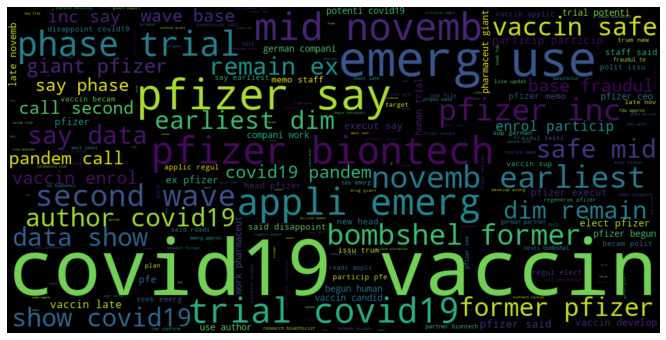

In [ ]:
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['clean_tweet']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')


Advanced

In [ ]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    #spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    #misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    #clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    clean_words = [x for x in doc if x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    #words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    words_to_split = [x for x in doc if x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    #clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

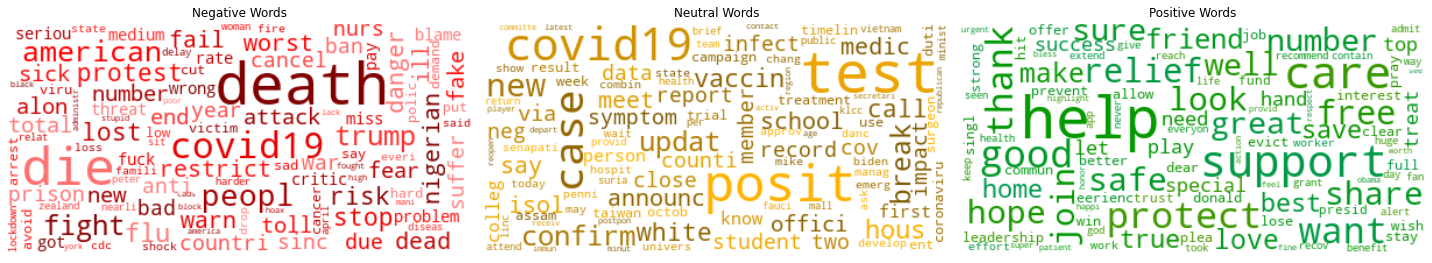

In [ ]:
import re
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='neg']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='pos']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neu']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = data
wordcloud_df['words'] = wordcloud_df.clean_tweet.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("/content/drive/MyDrive/Teaching at CUE/2021/Thesis/IT 581 Project/Summer 2021/Adeola IT 581 Project Thesis/Polarity_Subjectivity/sentiment_wordclouds.png", bbox_inches="tight")

In [ ]:
def senti(x):
  return TextBlob(x).sentiment 

In [ ]:
data['senti_score'] = data['clean_tweet'].astype(str).apply(senti)

In [ ]:
a = data['senti_score']
a

0                                         (0.0, 0.0)
1                                         (0.0, 0.0)
2         (-0.29285714285714287, 0.7857142857142857)
3                                         (0.0, 0.0)
4                                         (0.0, 0.0)
                             ...                    
555551                                    (0.0, 0.0)
555552                                    (0.0, 0.0)
555553                                    (0.0, 0.0)
555554                                    (0.0, 0.0)
555555                                  (0.35, 0.55)
Name: senti_score, Length: 555556, dtype: object

In [ ]:
import calendar
data['Month'] = data['month'].astype(int).apply(lambda x: calendar.month_abbr[x])

ValueError: ignored

In [ ]:
import numpy as np
np.unique(np.array(data['month']))

array([ 4.,  5.,  6.,  8.,  9., 10., nan, nan, nan, nan, nan, nan])

In [ ]:
a = str(data.created_at[0]).split(' ')
a

['Sun', 'Apr', '19', '21:21:54', '+0000', '2020']

'Apr'

In [ ]:
data

,created_at,clean_tweet,sentiment,senti_score,date,year,month,Month
0,Sun Apr 19 21:21:54 +0000 2020,call leader help protect refuge covid19 provid...,pos,"(0.0, 0.0)",2020-04-19 21:21:54+00:00,2020.0,4.0,Apr
1,Sun Apr 19 21:21:53 +0000 2020,ogun state support cbn nirsal covid19 target c...,pos,"(0.0, 0.0)",2020-04-19 21:21:53+00:00,2020.0,4.0,Apr
2,Sun Apr 19 21:21:52 +0000 2020,polic offici base namahadi polic station busi ...,pos,"(-0.29285714285714287, 0.7857142857142857)",2020-04-19 21:21:52+00:00,2020.0,4.0,Apr
3,Sun Apr 19 21:21:51 +0000 2020,covid19 oyo discharg two patient,neu,"(0.0, 0.0)",2020-04-19 21:21:51+00:00,2020.0,4.0,Apr
4,Sun Apr 19 21:21:50 +0000 2020,condol famili surviv,neu,"(0.0, 0.0)",2020-04-19 21:21:50+00:00,2020.0,4.0,Apr
...,...,...,...,...,...,...,...,...
555551,Tue Oct 20 20:35:43 +0000 2020,cultur china brillianc huax celebr th annivers...,neg,"(0.0, 0.0)",2020-10-20 20:35:43+00:00,2020.0,10.0,Oct
555552,Tue Oct 20 20:35:42 +0000 2020,trump call cnn bastard cover covid19 hear keil...,neg,"(0.0, 0.0)",2020-10-20 20:35:42+00:00,2020.0,10.0,Oct
555553,Tue Oct 20 20:35:41 +0000 2020,nurs home kansa singl resid test posit coronav...,neu,"(0.0, 0.0)",2020-10-20 20:35:41+00:00,2020.0,10.0,Oct
555554,Tue Oct 20 20:35:40 +0000 2020,trump call cnn bastard cover covid19 hear keil...,neg,"(0.0, 0.0)",2020-10-20 20:35:40+00:00,2020.0,10.0,Oct


In [ ]:
polarity = []
subjectivity = []
month = []

for i in range(len(data['month'])):
  polarity.append(data.iloc[i]['senti_score'][0])
  subjectivity.append(data.iloc[i]['senti_score'][1])
  month.append(data.iloc[i]['Month'])

In [ ]:
polarity[month=='APR']

0.0

In [ ]:
data = data.reindex()

In [ ]:
data.iloc[125]['senti_score'][0]

-0.23214285714285715

In [ ]:
data[['polarity', 'subjectivity']] = data['clean_tweet'].astype(str).apply(senti)

ValueError: ignored

In [ ]:
for i in range(len(data['month'])):
  data.iloc[i]['Polarity'] = data.iloc[i]['senti_score'][0]
  data.iloc[i]['Subjectivity'] = data.iloc[i]['senti_score'][1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data['Polarity'] = polarity

In [ ]:
data['Subjectivity'] = subjectivity

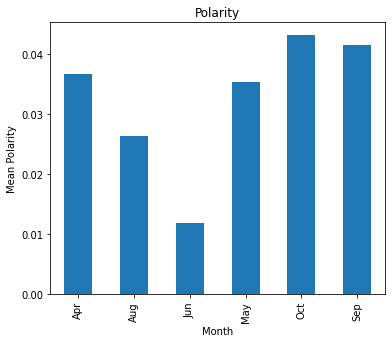

In [ ]:
dfg = data.groupby(['Month'])['Polarity'].mean()

dfg.plot(kind='bar', title='Polarity', ylabel='Mean Polarity',
         xlabel='Month', figsize=(6, 5))

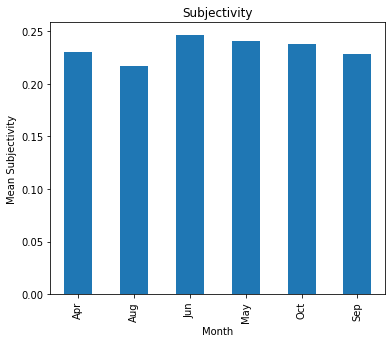

In [ ]:
dfg = data.groupby(['Month'])['Subjectivity'].mean()

dfg.plot(kind='bar', title='Subjectivity', ylabel='Mean Subjectivity',
         xlabel='Month', figsize=(6, 5))